# installations

In [1]:
!pip install pandas

In [2]:
!pip install -q transformers datasets evaluate scikit-learn torch

In [3]:
!pip install transformers[torch]

  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached accelerate-1.7.0-py3-none-any.whl.metadata (19 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl

In [4]:
!pip install accelerate>=0.26.0

In [5]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [6]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
Usi

In [7]:
!pip install ace_tools

  Using cached ace_tools-0.0-py3-none-any.whl.metadata (300 bytes)
Using cached ace_tools-0.0-py3-none-any.whl (1.1 kB)


In [8]:
!pip install -q bertviz  captum     

# uploading data

In [ ]:
import pandas as pd

# Use raw string (r'...') to avoid issues with backslashes in Windows paths
# file_path = r'FilteredData100.xlsx'
file_path = r'/home/eldord/Big-Data-Abstracts-Classification/data/FilteredData100.xlsx' # Adjust the path as needed


# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Preview the first few rows
print(df.head())


   Y1  Y2    Y    Domain                     area  \
0   0  12   12       CS    Symbolic computation     
1   5   2   74  Medical     Alzheimer's Disease     
2   4   7   68    Civil          Green Building     
3   1  10   26      ECE          Electric motor     
4   5  43  115  Medical     Parkinson's Disease     

                                            keywords  \
0   (2+1)-dimensional non-linear optical waves; e...   
1   Aging; Tau; Amyloid; PET; Alzheimer's disease...   
2   LED lighting system; PV system; Distributed l...   
3   NdFeB magnets; Electric motor; Electric vehic...   
4   Parkinson's disease; dyskinesia; adenosine A(...   

                                            Abstract  
0  (2 + 1)-dimensional non-linear optical waves t...  
1  (beta-amyloid (A beta) and tau pathology becom...  
2  (D)ecreasing of energy consumption and environ...  
3  (Hybrid) electric vehicles are assumed to play...  
4  (L)-3,4-Dihydroxyphenylalanine ((L)-DOPA) rema...  


# BERT

## domain

In [9]:

import os, random, numpy as np, pandas as pd, torch
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer, DataCollatorWithPadding)
import evaluate

# --------------------------- CONFIG --------------------------
SEED         = 42
MODEL_NAME   = "bert-base-uncased"          # vanilla BERT
LABEL_COL    = "Domain"                     # <- CHANGE if your label lives elsewhere
TEXT_COL     = "Abstract"
BATCH_SIZE   = 8
EPOCHS       = 3
LR           = 2e-5
# -------------------------------------------------------------

random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

# 1.-- Prepare the data -------------------------------------------------------
assert LABEL_COL in df.columns, f"{LABEL_COL} not found in dataframe"

# map label strings → integer ids
label_list        = sorted(df[LABEL_COL].unique())
label2id          = {l:i for i,l in enumerate(label_list)}
id2label          = {i:l for l,i in label2id.items()}
df["label"]       = df[LABEL_COL].map(label2id)

# train / val / test split (70/15/15)
train_df, temp_df = train_test_split(df, test_size=0.30, stratify=df["label"],
                                     random_state=SEED)
val_df, test_df   = train_test_split(temp_df, test_size=0.50, stratify=temp_df["label"],
                                     random_state=SEED)

hf_dset = DatasetDict({
    "train": Dataset.from_pandas(train_df[[TEXT_COL, "label"]]),
    "validation": Dataset.from_pandas(val_df[[TEXT_COL, "label"]]),
    "test": Dataset.from_pandas(test_df[[TEXT_COL, "label"]])
})

# 2.-- Tokenisation -----------------------------------------------------------
tok = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize(batch):
    return tok(batch[TEXT_COL], truncation=True)
hf_dset_tok = hf_dset.map(tokenize, batched=True, remove_columns=[TEXT_COL])
data_collator = DataCollatorWithPadding(tok)

# 3.-- Model -----------------------------------------------------------------
model = AutoModelForSequenceClassification.from_pretrained(
            MODEL_NAME,
            num_labels=len(label_list),
            id2label=id2label,
            label2id=label2id)

metric_acc  = evaluate.load("accuracy")
metric_f1   = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": metric_acc.compute(predictions=preds, references=labels)["accuracy"],
        "macro_f1": metric_f1.compute(predictions=preds, references=labels, average="macro")["f1"]
    }

# 4.-- Helper: quick evaluation ---------------------------------------------
def quick_eval(split: str, tag: str):
    trainer = Trainer(
        model=model,
        tokenizer=tok,
        data_collator=data_collator,
        compute_metrics=compute_metrics
    )
    print(f"\n[{tag}] Evaluating on {split} set …")
    metrics = trainer.evaluate(hf_dset_tok[split], metric_key_prefix=tag)
    for k,v in metrics.items():
        if k.startswith(tag):
            print(f"{k:<20}: {v:.4f}")
    return metrics

# Baseline (zero-shot) on val & test
baseline_val  = quick_eval("validation", tag="zero")
baseline_test = quick_eval("test",        tag="zero")


/home/eldord/.conda/envs/denisenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 6993/6993 [00:01<00:00, 3760.13 examples/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_1911966/526516142.py:69: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can


[zero] Evaluating on validation set …


zero_loss           : 2.1356
zero_model_preparation_time: 0.0024
zero_accuracy       : 0.0781
zero_macro_f1       : 0.0329
zero_runtime        : 28.0963
zero_samples_per_second: 248.8940
zero_steps_per_second: 31.1430

[zero] Evaluating on test set …


/tmp/ipykernel_1911966/526516142.py:69: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


zero_loss           : 2.1388
zero_model_preparation_time: 0.0022
zero_accuracy       : 0.0766
zero_macro_f1       : 0.0324
zero_runtime        : 23.7920
zero_samples_per_second: 293.9220
zero_steps_per_second: 36.7770


In [11]:

# 5.-- Fine-tune --------------------------------------------------------------
args = TrainingArguments(
    output_dir            = "bert_abstract_cls",
    eval_strategy   = "epoch",
    save_strategy         = "no",
    learning_rate         = LR,
    per_device_train_batch_size = BATCH_SIZE,
    per_device_eval_batch_size  = BATCH_SIZE,
    num_train_epochs      = EPOCHS,
    seed                  = SEED,
    weight_decay          = 0.01,
    logging_steps         = 50,
)

trainer = Trainer(
    model               = model,
    args                = args,
    train_dataset       = hf_dset_tok["train"],
    eval_dataset        = hf_dset_tok["validation"],
    tokenizer           = tok,
    data_collator       = data_collator,
    compute_metrics     = compute_metrics,
)

trainer.train()

# 6.-- Post-training evaluation ----------------------------------------------
fin_val  = quick_eval("validation", tag="fine")
fin_test = quick_eval("test",        tag="fine")

# 7.-- Simple side-by-side comparison ----------------------------------------
def compare(before, after, split):
    print(f"\n=== {split.upper()} SET ===")
    for m in ("accuracy","macro_f1"):
        b = before[f"zero_{m}"]; a = after[f"fine_{m}"]
        diff = a - b
        print(f"{m:>10}: {b:.4f} → {a:.4f}   (Δ {diff:+.4f})")

compare(baseline_val,  fin_val,  "validation")
compare(baseline_test, fin_test, "test")


/tmp/ipykernel_1911966/2879497533.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,0.556800,0.351497,0.896039,0.896640
2,0.209100,0.365154,0.910053,0.912850
3,0.159500,0.411463,0.913199,0.916731



[fine] Evaluating on validation set …


/tmp/ipykernel_1911966/526516142.py:69: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


fine_loss           : 0.4115
fine_model_preparation_time: 0.0022
fine_accuracy       : 0.9132
fine_macro_f1       : 0.9167
fine_runtime        : 23.7944
fine_samples_per_second: 293.8930
fine_steps_per_second: 36.7730

[fine] Evaluating on test set …


/tmp/ipykernel_1911966/526516142.py:69: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


fine_loss           : 0.3970
fine_model_preparation_time: 0.0022
fine_accuracy       : 0.9143
fine_macro_f1       : 0.9169
fine_runtime        : 23.8635
fine_samples_per_second: 293.0420
fine_steps_per_second: 36.6670

=== VALIDATION SET ===
  accuracy: 0.0781 → 0.9132   (Δ +0.8351)
  macro_f1: 0.0329 → 0.9167   (Δ +0.8839)

=== TEST SET ===
  accuracy: 0.0766 → 0.9143   (Δ +0.8377)
  macro_f1: 0.0324 → 0.9169   (Δ +0.8845)


## area

In [ ]:

import os, random, numpy as np, pandas as pd, torch
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer, DataCollatorWithPadding)
import evaluate

# --------------------------- CONFIG --------------------------
SEED         = 42
MODEL_NAME   = "bert-base-uncased"          # vanilla BERT
LABEL_COL    = "area"                     # <- CHANGE if your label lives elsewhere
TEXT_COL     = "Abstract"
BATCH_SIZE   = 8
EPOCHS       = 3
LR           = 2e-5
# -------------------------------------------------------------

random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

# 1.-- Prepare the data -------------------------------------------------------
assert LABEL_COL in df.columns, f"{LABEL_COL} not found in dataframe"

# map label strings → integer ids
label_list        = sorted(df[LABEL_COL].unique())
label2id          = {l:i for i,l in enumerate(label_list)}
id2label          = {i:l for l,i in label2id.items()}
df["label"]       = df[LABEL_COL].map(label2id)

# train / val / test split (70/15/15)
train_df, temp_df = train_test_split(df, test_size=0.30, stratify=df["label"],
                                     random_state=SEED)
val_df, test_df   = train_test_split(temp_df, test_size=0.50, stratify=temp_df["label"],
                                     random_state=SEED)

hf_dset = DatasetDict({
    "train": Dataset.from_pandas(train_df[[TEXT_COL, "label"]]),
    "validation": Dataset.from_pandas(val_df[[TEXT_COL, "label"]]),
    "test": Dataset.from_pandas(test_df[[TEXT_COL, "label"]])
})

# 2.-- Tokenisation -----------------------------------------------------------
tok = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize(batch):
    return tok(batch[TEXT_COL], truncation=True)
hf_dset_tok = hf_dset.map(tokenize, batched=True, remove_columns=[TEXT_COL])
data_collator = DataCollatorWithPadding(tok)

# 3.-- Model -----------------------------------------------------------------
model = AutoModelForSequenceClassification.from_pretrained(
            MODEL_NAME,
            num_labels=len(label_list),
            id2label=id2label,
            label2id=label2id)

metric_acc  = evaluate.load("accuracy")
metric_f1   = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": metric_acc.compute(predictions=preds, references=labels)["accuracy"],
        "macro_f1": metric_f1.compute(predictions=preds, references=labels, average="macro")["f1"]
    }

# 4.-- Helper: quick evaluation ---------------------------------------------
def quick_eval(split: str, tag: str):
    trainer = Trainer(
        model=model,
        tokenizer=tok,
        data_collator=data_collator,
        compute_metrics=compute_metrics
    )
    print(f"\n[{tag}] Evaluating on {split} set …")
    metrics = trainer.evaluate(hf_dset_tok[split], metric_key_prefix=tag)
    for k,v in metrics.items():
        if k.startswith(tag):
            print(f"{k:<20}: {v:.4f}")
    return metrics

# Baseline (zero-shot) on val & test
baseline_val  = quick_eval("validation", tag="zero")
baseline_test = quick_eval("test",        tag="zero")


# BERT-base-uncased-MNLI

### final result reprinting

In [ ]:
# ╔══════════════════════════╗
# ║ Consistent re-evaluation ║
# ╚══════════════════════════╝
import pathlib, re, random, numpy as np, pandas as pd, torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset, DatasetDict
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer)

ROOT       = pathlib.Path("/sise/home/eldord/Big-Data-Abstracts-Classification")
DATA_PATH  = ROOT / "data" / "FilteredData100.xlsx"
AREA_CKPT  = ROOT / "models" / "bert_wos_areas"
DOM_CKPT   = max((ROOT / "models" / "bert_wos_domains").glob("checkpoint-*"),
                 key=lambda p: int(re.search(r"\d+$", p.name)[0]))           # latest
TEXT_COL   = "Abstract"
AREA_COL   = "area"
DOMAIN_COL = "Domain"
SEED       = 42

rng = random.Random(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

# ──────────────────────────────────────────────────────────
# 1. Load raw dataframe once
# ──────────────────────────────────────────────────────────
raw_df = pd.read_excel(DATA_PATH)[[TEXT_COL, AREA_COL, DOMAIN_COL]].dropna()
raw_df[AREA_COL]   = raw_df[AREA_COL].str.strip()
raw_df[DOMAIN_COL] = raw_df[DOMAIN_COL].str.strip()

# label-map used in *domain* training
DOMAIN_NAME_MAP = {
    "CS": "Computer Science", "Civil": "Civil Engineering",
    "ECE": "Electrical & Computer Eng.", "MAE": "Mechanical & Aero Eng.",
    "Medical": "Medical Sciences", "Psychology": "Psychology",
    "biochemistry": "Biochemistry",
}
dom_df = raw_df.copy()
dom_df[DOMAIN_COL] = dom_df[DOMAIN_COL].map(DOMAIN_NAME_MAP)

# helper to build a 70-15-15 split on a chosen label column
def build_split(df, label_col):
    train, tmp = train_test_split(
        df, test_size=0.30, stratify=df[label_col], random_state=SEED)
    val, test = train_test_split(
        tmp, test_size=0.50, stratify=tmp[label_col], random_state=SEED)
    return DatasetDict({
        "train":      Dataset.from_pandas(train.reset_index(drop=True)),
        "validation": Dataset.from_pandas(val.reset_index(drop=True)),
        "test":       Dataset.from_pandas(test.reset_index(drop=True)),
    })

area_ds = build_split(raw_df, AREA_COL)    # ↖ uses raw area codes (134 classes)
dom_ds  = build_split(dom_df,  DOMAIN_COL) # ↖ uses *mapped* domain names (7)

# ──────────────────────────────────────────────────────────
# 2. Generic evaluator
# ──────────────────────────────────────────────────────────
def evaluate(model_dir: pathlib.Path,
             dset: DatasetDict,
             text_col: str,
             label_col: str,
             title: str):
    device = "cuda" if torch.cuda.is_available() else "cpu"

    tok   = AutoTokenizer.from_pretrained(model_dir)
    mdl   = AutoModelForSequenceClassification.from_pretrained(model_dir)
    mdl.to(device).eval()

    l2id  = {k: int(v) for k, v in mdl.config.label2id.items()}

    # filter out unexpected labels (should be zero, but safe)
    dset = dset.filter(lambda ex: ex[label_col] in l2id)

    def tok_fn(batch):
        enc = tok(batch[text_col], truncation=True)  # same max_len as training
        enc["labels"] = [l2id[x] for x in batch[label_col]]
        return enc

    tok_ds = dset.map(tok_fn, batched=True,
                      remove_columns=[TEXT_COL, AREA_COL, DOMAIN_COL])

    args = TrainingArguments("tmp_eval", per_device_eval_batch_size=32,
                             do_predict=True, fp16=torch.cuda.is_available(),
                             logging_strategy="no")
    tr   = Trainer(model=mdl, args=args, tokenizer=tok)

    def metrics(split):
        out      = tr.predict(tok_ds[split])
        y_true   = out.label_ids
        y_pred   = out.predictions.argmax(axis=-1)
        acc      = accuracy_score(y_true, y_pred)
        pM,rM,fM,_ = precision_recall_fscore_support(
            y_true, y_pred, average="macro", zero_division=0)
        pW,rW,fW,_ = precision_recall_fscore_support(
            y_true, y_pred, average="weighted", zero_division=0)
        return acc,pM,rM,fM,pW,rW,fW,len(y_true)

    print(f"\n── {title} ({model_dir.name}) ──")
    print("Split        |  Acc   | P_macro | R_macro | F_macro | "
          "P_weight | R_weight | F_weight | #ex")
    print("-------------+--------+---------+---------+---------+"
          "----------+----------+----------+-----")
    for split in ["train","validation","test"]:
        print("{:<12}| {:6.3f} | {:7.3f} | {:7.3f} | {:7.3f} | "
              "{:8.3f} | {:8.3f} | {:8.3f} | {:5d}"
              .format(split, *metrics(split)))

# ──────────────────────────────────────────────────────────
# 3. Run evaluations on each model’s own split
# ──────────────────────────────────────────────────────────
evaluate(AREA_CKPT, area_ds, TEXT_COL, AREA_COL, "Area classifier")
evaluate(DOM_CKPT,  dom_ds,  TEXT_COL, DOMAIN_COL, "Domain classifier")


Map: 100%|██████████| 6993/6993 [00:02<00:00, 3418.88 examples/s]


── Area classifier (bert_wos_areas) ──
Split        |  Acc   | P_macro | R_macro | F_macro | P_weight | R_weight | F_weight | #ex
-------------+--------+---------+---------+---------+----------+----------+----------+-----



/tmp/ipykernel_456555/4042291231.py:85: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  tr   = Trainer(model=mdl, args=args, tokenizer=tok)


train       |  0.974 |   0.970 |   0.969 |   0.969 |    0.974 |    0.974 |    0.974 | 32634


validation  |  0.824 |   0.817 |   0.814 |   0.814 |    0.825 |    0.824 |    0.823 |  6993


test        |  0.819 |   0.815 |   0.808 |   0.810 |    0.821 |    0.819 |    0.819 |  6993


Map: 100%|██████████| 6993/6993 [00:01<00:00, 3664.96 examples/s]


── Domain classifier (checkpoint-20400) ──
Split        |  Acc   | P_macro | R_macro | F_macro | P_weight | R_weight | F_weight | #ex
-------------+--------+---------+---------+---------+----------+----------+----------+-----



/tmp/ipykernel_456555/4042291231.py:85: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  tr   = Trainer(model=mdl, args=args, tokenizer=tok)


train       |  0.990 |   0.990 |   0.990 |   0.990 |    0.990 |    0.990 |    0.990 | 32634


validation  |  0.914 |   0.919 |   0.916 |   0.917 |    0.914 |    0.914 |    0.914 |  6993


test        |  0.914 |   0.919 |   0.914 |   0.917 |    0.914 |    0.914 |    0.914 |  6993


## domain + evaluations

/home/eldord/.conda/envs/denisenv2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Domain labels: ['Biochemistry', 'Civil Engineering', 'Computer Science', 'Electrical & Computer Eng.', 'Mechanical & Aero Eng.', 'Medical Sciences', 'Psychology']


Device set to use cuda:0
Map: 100%|██████████| 6993/6993 [00:02<00:00, 2653.44 examples/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at textattack/bert-base-uncased-MNLI and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([7]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_1377425/1691991101.py:164: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,0.416600,0.403235,0.892464,0.893943
2,0.307900,0.361166,0.906764,0.907762
3,0.198100,0.431570,0.909624,0.912988
4,0.121800,0.474804,0.914486,0.917302
5,0.095000,0.523038,0.913771,0.917498



=== VALIDATION ===
accuracy: 0.3862 → 0.9138   (Δ +0.5275)
macro_f1: 0.3198 → 0.9175   (Δ +0.5977)

=== TEST ===
accuracy: 0.3892 → 0.9142   (Δ +0.5250)
macro_f1: 0.3209 → 0.9166   (Δ +0.5956)


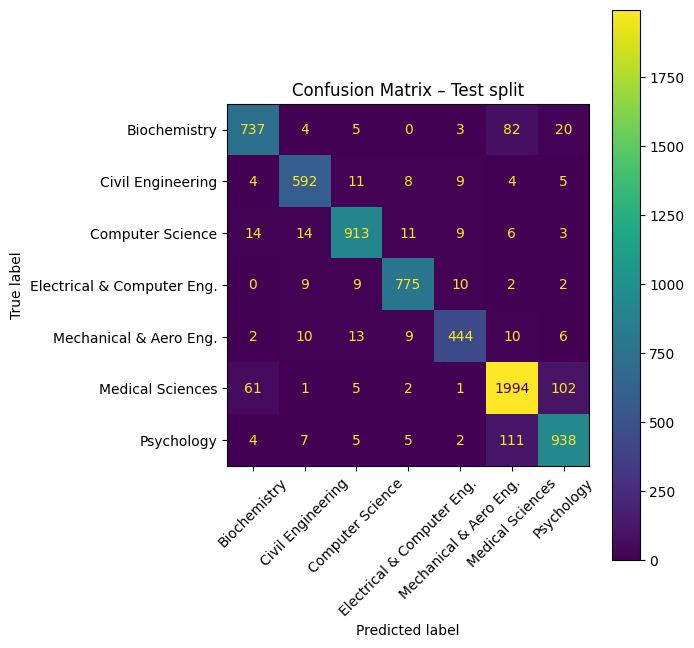

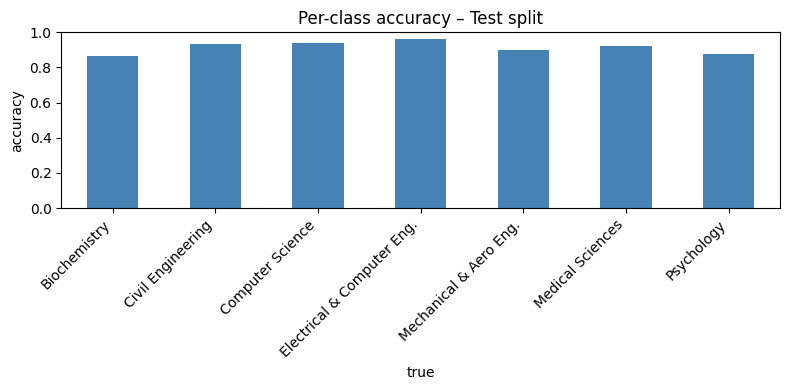

In [ ]:
# ===========================================================================
# Web-of-Science · domain-level zero-shot BERT-MNLI  →  fine-tune & interpret
# ===========================================================================

import os, random, numpy as np, torch, pandas as pd, evaluate, matplotlib.pyplot as plt
from datasets import Dataset, DatasetDict, load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer, pipeline)
from tqdm.auto import tqdm

SEED            = 42
VARIANT         = "WOS46985"                 # Irrelevant once you load your XLSX
ZS_MODEL_NAME   = "textattack/bert-base-uncased-MNLI"
BATCH_SIZE_ZS   = 64                         # good for 12-GB GPU
BATCH_SIZE_FT   = 8
EPOCHS          = 5
LR              = 2e-5

# ---------------------------------------------------------------------------
# 0. Reproducibility
# ---------------------------------------------------------------------------
rng = random.Random(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# ---------------------------------------------------------------------------
# 1. Load the Excel sheet  ➜  HuggingFace DatasetDict
# ---------------------------------------------------------------------------
FILE_PATH   = "/home/eldord/Big-Data-Abstracts-Classification/data/FilteredData100.xlsx"
TEXT_COL    = "Abstract"
LABEL_COL   = "Domain"

# ---- map short labels → full names ----------------------------------------
DOMAIN_NAME_MAP = {
    "CS":          "Computer Science",
    "Civil":       "Civil Engineering",
    "ECE":         "Electrical & Computer Eng.",
    "MAE":         "Mechanical & Aero Eng.",
    "Medical":     "Medical Sciences",
    "Psychology":  "Psychology",
    "biochemistry":"Biochemistry",
}

df = (
    pd.read_excel(FILE_PATH)[[TEXT_COL, LABEL_COL]]
      .dropna()
      .assign(**{LABEL_COL: lambda d: d[LABEL_COL].str.strip()})
)
df[LABEL_COL] = df[LABEL_COL].map(DOMAIN_NAME_MAP)   # translate codes

label_list  = sorted(df[LABEL_COL].unique())          # 7 human-readable labels
label2id    = {l: i for i, l in enumerate(label_list)}
id2label    = {i: l for l, i in label2id.items()}
df["label"] = df[LABEL_COL].map(label2id)

print("Domain labels:", label_list)

# ---- 70 / 15 / 15 split ----------------------------------------------------
train_df, temp_df = train_test_split(
    df, test_size=0.30, stratify=df["label"], random_state=SEED)
val_df,   test_df = train_test_split(
    temp_df, test_size=0.50, stratify=temp_df["label"], random_state=SEED)

hf_dset = DatasetDict({
    "train":      Dataset.from_pandas(train_df[[TEXT_COL, "label"]]),
    "validation": Dataset.from_pandas(val_df[[TEXT_COL, "label"]]),
    "test":       Dataset.from_pandas(test_df[[TEXT_COL, "label"]]),
})

# ---------------------------------------------------------------------------
# 2. Zero-shot evaluation (MNLI BERT as-is)
# ---------------------------------------------------------------------------
mnli = AutoModelForSequenceClassification.from_pretrained(ZS_MODEL_NAME)
mnli.config.label2id = {"contradiction": 0, "neutral": 1, "entailment": 2}
mnli.config.id2label = {v:k for k,v in mnli.config.label2id.items()}

zs_pipe = pipeline(
    "zero-shot-classification",
    model      = mnli,
    tokenizer  = ZS_MODEL_NAME,
    device     = 0 if torch.cuda.is_available() else -1,
    batch_size = BATCH_SIZE_ZS,
)

def zs_predict(texts, labels=label_list):
    preds = []
    for i in tqdm(range(0, len(texts), BATCH_SIZE_ZS), desc="zero-shot"):
        outs = zs_pipe(
            texts[i:i+BATCH_SIZE_ZS],
            candidate_labels   = labels,
            hypothesis_template= "This abstract is about {}.",
            multi_label=False,
        )
        preds.extend(label2id[o["labels"][0]] for o in outs)
    return preds

metric_acc = evaluate.load("accuracy")
metric_f1  = evaluate.load("f1")

def eval_split(split, predicts):
    refs = hf_dset[split]["label"]
    acc  = metric_acc.compute(predictions=predicts, references=refs)["accuracy"]
    f1   = metric_f1 .compute(predictions=predicts, references=refs,
                              average="macro")["f1"]
    return {"accuracy": acc, "macro_f1": f1}

zs_val_preds  = zs_predict(hf_dset["validation"][TEXT_COL])
zs_test_preds = zs_predict(hf_dset["test"][TEXT_COL])
baseline_val  = eval_split("validation", zs_val_preds)
baseline_test = eval_split("test",       zs_test_preds)

# ---------------------------------------------------------------------------
# 3. Tokenise & fine-tune the classifier head (7-way) on your data
# ---------------------------------------------------------------------------
tok = AutoTokenizer.from_pretrained(ZS_MODEL_NAME)

def tok_fn(batch): return tok(batch[TEXT_COL], truncation=True)
ds_tok = hf_dset.map(tok_fn, batched=True, remove_columns=[TEXT_COL])

from transformers import DataCollatorWithPadding
collator = DataCollatorWithPadding(tok)

ft_model = AutoModelForSequenceClassification.from_pretrained(
    ZS_MODEL_NAME,
    num_labels = len(label_list),
    id2label   = id2label,
    label2id   = label2id,
    ignore_mismatched_sizes=True,        # swaps 3-way → 7-way head
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": metric_acc.compute(predictions=preds,
                                       references=labels)["accuracy"],
        "macro_f1": metric_f1.compute(predictions=preds,
                                      references=labels,
                                      average="macro")["f1"],
    }


train_args = TrainingArguments(
    output_dir                 = "bert_wos_domains",
    learning_rate              = LR,
    per_device_train_batch_size= BATCH_SIZE_FT,
    per_device_eval_batch_size = BATCH_SIZE_FT,
    eval_strategy              = "epoch",
    save_strategy              = "epoch",
    num_train_epochs           = EPOCHS,
    seed                       = SEED,
    weight_decay               = 0.01,
    logging_steps              = 100,
)

trainer = Trainer(
    model           = ft_model,
    args            = train_args,
    train_dataset   = ds_tok["train"],
    eval_dataset    = ds_tok["validation"],
    tokenizer       = tok,
    data_collator   = collator,
    compute_metrics = compute_metrics,
)
trainer.train()

# ---- post-tuning evaluation -----------------------------------------------
fine_val  = trainer.evaluate(ds_tok["validation"], metric_key_prefix="fine")
fine_test = trainer.evaluate(ds_tok["test"],        metric_key_prefix="fine")

def compare(before, after, split):
    print(f"\n=== {split.upper()} ===")
    for m in ("accuracy", "macro_f1"):
        b = before[m];     a = after[f"fine_{m}"]
        print(f"{m:>8}: {b:.4f} → {a:.4f}   (Δ {a-b:+.4f})")
compare(baseline_val,  fine_val,  "validation")
compare(baseline_test, fine_test, "test")

# ---------------------------------------------------------------------------
# 4. Classic visualisations (confusion-matrix, per-class accuracy)
# ---------------------------------------------------------------------------
test_out   = trainer.predict(ds_tok["test"])
y_true     = test_out.label_ids
y_pred     = np.argmax(test_out.predictions, axis=-1)
test_texts = hf_dset["test"][TEXT_COL]

cm = confusion_matrix(y_true, y_pred, labels=list(range(len(label_list))))
fig, ax = plt.subplots(figsize=(7, 7))
ConfusionMatrixDisplay(cm, display_labels=label_list).plot(ax=ax)
plt.title("Confusion Matrix – Test split"); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

per_class_acc = (
    pd.DataFrame({"true": y_true, "correct": y_true == y_pred})
      .groupby("true")["correct"].mean()
      .reindex(range(len(label_list)))
)
fig, ax = plt.subplots(figsize=(8, 4))
per_class_acc.plot(kind="bar", ax=ax, color="steelblue")
ax.set_ylabel("accuracy"); ax.set_title("Per-class accuracy – Test split")
plt.xticks(ticks=range(len(label_list)), labels=label_list, rotation=45, ha="right")
plt.ylim(0, 1); plt.tight_layout(); plt.show()


### BERTviz

In [13]:
# ╔════════════════════════════════════════════════════════════════════════╗
# ║  1.  Load *domain* checkpoint                                         ║
# ║  2.  BertViz helper: keep top-k non-stop tokens      (colour intact)  ║
# ╚════════════════════════════════════════════════════════════════════════╝
import pathlib, re, html, torch, numpy as np
from bertviz import head_view
from captum.attr import LayerIntegratedGradients
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from transformers import AutoTokenizer, AutoModelForSequenceClassification

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
ROOT   = pathlib.Path("/sise/home/eldord/Big-Data-Abstracts-Classification")

# ───────────────────────────── load latest domain checkpoint ──────────────
dom_ckpts = sorted((ROOT / "models" / "bert_wos_domains").glob("checkpoint-*"),
                   key=lambda p: int(re.search(r"\d+$", p.name)[0]))
MODEL_DIR = dom_ckpts[-1]                            # newest
tok       = AutoTokenizer.from_pretrained(MODEL_DIR)
ft_model  = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
ft_model.to(DEVICE).eval()

STOP_WORDS = ENGLISH_STOP_WORDS

# ───────────────────────────── BertViz helper ─────────────────────────────
# def save_focus_attention(text: str,
#                          k_tokens: int = 30,
#                          html_file: str = "bert_attention_focus.html") -> str:
#     enc = tok(text, return_tensors="pt", truncation=True).to(DEVICE)
#     with torch.no_grad():
#         outs = ft_model(**enc, output_attentions=True)

#     # ----- IG scores -------------------------------------------------------
#     def _f(ids, mask): return ft_model(input_ids=ids,
#                                        attention_mask=mask).logits
#     lig    = LayerIntegratedGradients(_f, ft_model.bert.embeddings)
#     logits = _f(enc["input_ids"], enc["attention_mask"])
#     pred   = logits.argmax(-1).item()

#     atts, _ = lig.attribute(enc["input_ids"],
#                             additional_forward_args=(enc["attention_mask"],),
#                             target=pred, n_steps=25,
#                             return_convergence_delta=True)
#     scores = atts.sum(-1).squeeze(0).cpu().numpy()        # (seq_len,)

#     tokens = tok.convert_ids_to_tokens(enc["input_ids"][0])
#     cls, sep = 0, len(tokens) - 1

#     # ----- choose top-k non-stop tokens -----------------------------------
#     keep = np.zeros_like(scores, dtype=bool)
#     abs_s = np.abs(scores).copy()
#     abs_s[[cls, sep]] = -1
#     keep[np.argsort(abs_s)[-k_tokens:]] = True
#     for i, t in enumerate(tokens):
#         if t.lower().lstrip("##") in STOP_WORDS and i not in (cls, sep):
#             keep[i] = False
#     keep[[cls, sep]] = True
#     keep_idx = np.where(keep)[0]

#     # ----- slice attentions, keep batch dim --------------------------------
#     sliced = []
#     for layer in outs.attentions:                       # (1, heads, L, L)
#         # keep the 1-batch dim, slice last two dims
#         layer = layer[:, :, keep_idx][:, :, :, keep_idx]   # (1, heads, K, K)
#         sliced.append(layer.squeeze(0))                    # -> (heads, K, K)
#     # add batch dim back so shape = (1, heads, K, K)
#     attn_tuple = tuple(torch.tensor(l).unsqueeze(0) for l in sliced)

#     # ----- tokens (1-to-1 with K) -----------------------------------------
#     pretty_tokens = [html.escape(tokens[i].replace('##', '')) for i in keep_idx]

#     html_obj = head_view(attn_tuple,
#                          pretty_tokens,
#                          prettify_tokens=False,          # already cleaned
#                          html_action="return")

#     out = pathlib.Path(html_file).expanduser().resolve()
#     out.write_text(html_obj.data, encoding="utf-8")
#     return str(out)

import re

import re, html, pathlib, torch, numpy as np
from bertviz import head_view
from captum.attr import LayerIntegratedGradients
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# ──────────────────────────────────────────────────────────
# more vibrant “Tableau 10” colors, hex-coded
# ──────────────────────────────────────────────────────────

VIBRANT_PALETTE = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
]

STOP_WORDS = ENGLISH_STOP_WORDS


def save_focus_attention(text: str,
                         k_tokens: int = 30,
                         html_file: str = "bert_attention_focus.html") -> str:
    # 1️⃣ tokenize + get heads
    enc = tok(text, return_tensors="pt", truncation=True).to(DEVICE)
    with torch.no_grad():
        outs = ft_model(**enc, output_attentions=True)

    # 2️⃣ Integrated Gradients scoring
    def _f(ids, mask):
        return ft_model(input_ids=ids, attention_mask=mask).logits
    lig    = LayerIntegratedGradients(_f, ft_model.bert.embeddings)
    logits = _f(enc["input_ids"], enc["attention_mask"])
    pred   = logits.argmax(-1).item()
    atts, _ = lig.attribute(
        enc["input_ids"],
        additional_forward_args=(enc["attention_mask"],),
        target=pred, n_steps=25, return_convergence_delta=True
    )
    scores = atts.sum(-1).squeeze(0).cpu().numpy()   # (L,)

    # 3️⃣ pick top-k non-stop tokens + always keep CLS/SEP
    toks   = tok.convert_ids_to_tokens(enc["input_ids"][0])
    cls, sep = 0, len(toks) - 1

    mask = np.zeros_like(scores, dtype=bool)
    abs_s = np.abs(scores).copy()
    abs_s[[cls, sep]] = -1
    mask[np.argsort(abs_s)[-k_tokens:]] = True

    for i, t in enumerate(toks):
        if ((t.lower().lstrip("##") in STOP_WORDS) or t == "-") and i not in (cls, sep):
            mask[i] = False

    mask[[cls, sep]] = True
    idx = np.where(mask)[0]

    # 4️⃣ slice out only those tokens in each layer/head (keep batch dim)
    layers = []
    for layer in outs.attentions:                # shape (1, heads, L, L)
        sl = layer[:, :, idx][:, :, :, idx]      # (1, heads, K, K)
        layers.append(sl)
    attn_tuple = tuple(torch.tensor(l) for l in layers)

    # 5️⃣ prettify tokens (strip “##” + HTML-escape)
    pretty = [html.escape(toks[i].replace("##", "")) for i in idx]

    # 6️⃣ generate the default BertViz HTML
    html_obj = head_view(
        attn_tuple,
        pretty,
        prettify_tokens=False,
        html_action="return"
    )
    data = html_obj.data

    # 7️⃣ replace ANY JS array called “color” or “colors” with our palette
    pal_js = "[" + ",".join(f'"{c}"' for c in VIBRANT_PALETTE) + "]"
    data = re.sub(
        r"(var\s+colors?\s*=\s*)\[[^\]]*\];",
        fr"\1{pal_js};",
        data
    )

    # 8️⃣ write out
    out = pathlib.Path(html_file).expanduser().resolve()
    out.write_text(data, encoding="utf-8")
    return str(out)

# ───────────────────────────── example usage ───────────────────────────────
example_text = (
    "We propose a transformer-based framework for classifying research "
    "papers across seven scientific domains.  Extensive experiments on the "
    "Web-of-Science dataset show state-of-the-art performance."
)

html_path = save_focus_attention(example_text,
                                 k_tokens=30,
                                 html_file="vibrant_domain_attention.html")
print("✓ BertViz saved →", html_path)
# On Linux:  !xdg-open domain_attention.html


✓ BertViz saved → /sise/home/eldord/Big-Data-Abstracts-Classification/models/vibrant_domain_attention.html


/tmp/ipykernel_637491/2678431385.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attn_tuple = tuple(torch.tensor(l) for l in layers)


### captum LIG vis

In [ ]:
import torch
import pathlib
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from captum.attr import LayerIntegratedGradients, visualization

# ────────────────────────────────────────────────────────────
# 0.  Load your saved domain‐fine‐tuned checkpoint
# ────────────────────────────────────────────────────────────
import pathlib, torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 1. Base project folder (adjust if your notebook’s cwd is different)
ROOT      = pathlib.Path("/sise/home/eldord/Big-Data-Abstracts-Classification")

# 2. Exact path to your domain checkpoint
#    (no "models/models" double-up)
MODEL_DIR = ROOT / "models" / "bert_wos_domains" / "checkpoint-20400"
assert MODEL_DIR.exists(), f"{MODEL_DIR} not found!"

# 3. Load tokenizer + model from that folder only
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tok      = AutoTokenizer.from_pretrained(
    str(MODEL_DIR),
    local_files_only=True       # <-- force local lookup
)
ft_model = AutoModelForSequenceClassification.from_pretrained(
    str(MODEL_DIR),
    local_files_only=True,      # <-- force local lookup
)
ft_model.to(DEVICE).eval()


# mapping from model‐internals back to human labels
id2label  = {int(k): v for k, v in ft_model.config.id2label.items()}

# ────────────────────────────────────────────────────────────
# 1.  Build a simple forward fn for Captum
# ────────────────────────────────────────────────────────────
def _forward(input_ids, attention_mask=None):
    return ft_model(input_ids=input_ids,
                    attention_mask=attention_mask).logits

lig = LayerIntegratedGradients(_forward, ft_model.bert.embeddings)

# ────────────────────────────────────────────────────────────
# 2.  Token‐importance via LayerIntegratedGradients
# ────────────────────────────────────────────────────────────
def token_importance(text: str, true_label: str = None):
    # encode the text
    enc = tok(text,
              return_tensors="pt",
              truncation=True,
              max_length=512  # match your training
    ).to(DEVICE)

    # get the model’s prediction
    with torch.no_grad():
        logits  = ft_model(**enc).logits
        pred_id = logits.argmax(dim=-1).item()
        pred_pb = torch.softmax(logits, dim=-1)[0, pred_id].item()

    # compute attributions
    atts, delta = lig.attribute(
        inputs                 = enc["input_ids"],
        additional_forward_args= (enc["attention_mask"],),
        target                 = pred_id,
        n_steps                = 25,
        return_convergence_delta=True
    )

    # collapse over embedding dims → one score per token
    scores = atts.sum(dim=-1).squeeze(0).cpu().numpy()   # (seq_len,)
    tokens = tok.convert_ids_to_tokens(enc["input_ids"][0])  # length = seq_len

    # determine true label for display
    if true_label is None:
        true_label = id2label[pred_id]

    # build the VisualizationDataRecord
    vis_rec = visualization.VisualizationDataRecord(
        word_attributions   = scores,               # importance scores
        pred_prob           = pred_pb,             # softmax probability
        pred_class          = id2label[pred_id],   # predicted label
        true_class          = true_label,          # provided or same as pred
        attr_class          = id2label[pred_id],   # which class attributions target
        attr_score          = scores.sum(),        # sum of attributions
        raw_input_ids       = tokens,              # token list
        convergence_score   = delta.item()         # IG convergence delta
    )
    return vis_rec

# ────────────────────────────────────────────────────────────
# 3.  Example usage
# ────────────────────────────────────────────────────────────
example_text = """
We propose and evaluate an authentication scheme that improves usability and user experience issues in the authentication process due to its reliance on people's aesthetic tastes and preferences. The scheme uses aesthetic images to verify the identity of computer users. It relies on three major premises regarding visual aesthetics: (i) that an individual has different preferences for different aesthetic stimuli; (ii) that these preferences are relatively consistent; and (iii) that aesthetic tastes are subjective and, therefore, there are considerable individual differences in aesthetic preferences. Following a review of the scientific basis for these premises, we describe the concept of the aesthetic evaluation-based authentication (AEbA) method and illustrate an implementation of it. We address AEbA's advantages and disadvantages relative to other related methods and conclude that it is adequate for low-to-medium security domains. It cannot serve as a compulsory method because we suspect that a certain portion of the user population lacks the degree of aesthetic sensitivity required to use the system effectively. On the plus side, the method offers a positive experience. It alleviates the burden of memorizing passwords to a minimum, and relative to other usability-oriented schemes provides better security in terms of shoulder-surfing, phishing, and password space. Finally, we report on a pilot evaluation of the concept and its feasibility that supports the method's main tenets, provides insights about implementation challenges and suggestions for improvements.
"""
true_label = "Computer Science"  
# true_area   = "Computer & Information Security"  # (only needed if you run an area-level model)

vis = token_importance(example_text, true_label=None)
visualization.visualize_text([vis])  # shows the Captum HTML widget in Jupyter


## area + evaluations

In [ ]:
# ===========================================================================
# Web-of-Science   ·   Domain-level baseline → fine-tune
# ===========================================================================

# !pip install -qq datasets transformers evaluate tqdm

import random, os, numpy as np, torch, evaluate
from datasets import load_dataset, DatasetDict
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer, pipeline)
from tqdm.auto import tqdm

SEED            = 42
VARIANT         = "WOS46985"               # "WOS11967" / "WOS5736" also work
ZS_MODEL_NAME   = "textattack/bert-base-uncased-MNLI"
BATCH_SIZE_ZS   = 64                       # >= 32 is safe with a 12-GB GPU
BATCH_SIZE_FT   = 8
EPOCHS          = 10
LR              = 2e-5

rng = random.Random(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# ---------------------------------------------------------------------------
# 1.  LOAD YOUR EXCEL SHEET  (instead of load_dataset)  ----------------------
# ---------------------------------------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

SEED = 42                                    # keep the same seed everywhere
TEXT_COL  = "Abstract"                       # column that holds the text
LABEL_COL = "area"                         # ← change to "area" later on
FILE_PATH = r"/home/eldord/Big-Data-Abstracts-Classification/data/FilteredData100.xlsx"          # your file

# -- read the sheet ----------------------------------------------------------
df = pd.read_excel(FILE_PATH)[[TEXT_COL, LABEL_COL]].dropna()


# Clean area names and build readable names
df[LABEL_COL] = df[LABEL_COL].str.strip()

def prettify_area(code):
    rep = (("BIOCHEM", "biochemistry"), ("MOL", "molecular"), ("BIOL", "biology"),
           ("CS", "computer science"), ("NLP", "natural language processing"),
           ("IR", "information retrieval"), ("EE", "electrical engineering"),
           ("MECH", "mechanical engineering"), ("MED", "medical science"),
           ("CHEM", "chemistry"), ("PHY", "physics"))
    txt = code.lower().replace('-', ' ')
    for a, b in rep:
        txt = txt.replace(a.lower(), b)
    return txt.replace("  ", " ").strip()

label_list  = sorted(df[LABEL_COL].unique())              # 134 areas
nice_names  = {label: prettify_area(label) for label in label_list}
labels_for_zs = [nice_names[label] for label in label_list]

label2id = {l: i for i, l in enumerate(label_list)}
id2label = {i: l for l, i in label2id.items()}
df["label"] = df[LABEL_COL].map(label2id)


# -- split 70 / 15 / 15 ------------------------------------------------------
train_df, temp_df = train_test_split(
        df, test_size=0.30, stratify=df["label"], random_state=SEED)
val_df,   test_df = train_test_split(
        temp_df, test_size=0.50, stratify=temp_df["label"], random_state=SEED)

hf_dset = DatasetDict({
    "train":      Dataset.from_pandas(train_df[[TEXT_COL, "label"]],
                                      preserve_index=False),
    "validation": Dataset.from_pandas(val_df[[TEXT_COL, "label"]],
                                      preserve_index=False),
    "test":       Dataset.from_pandas(test_df[[TEXT_COL, "label"]],
                                      preserve_index=False),
})

print(f"Loaded {len(df):,} rows   –   {len(label_list)} unique labels:")
print(label_list)


# ---------------------------------------------------------------------------
# 2.  ZERO-SHOT evaluation with MNLI-BERT   (fast: N × 7 only) --------------
# ---------------------------------------------------------------------------

mnli = AutoModelForSequenceClassification.from_pretrained(ZS_MODEL_NAME)
mnli.config.label2id = {"contradiction": 0, "neutral": 1, "entailment": 2}
mnli.config.id2label = {v:k for k,v in mnli.config.label2id.items()}

zs_pipe = pipeline("zero-shot-classification",
                   model     = mnli,
                   tokenizer = ZS_MODEL_NAME,
                   device    = 0 if torch.cuda.is_available() else -1,
                   batch_size= BATCH_SIZE_ZS)


def zs_predict(texts, labels=labels_for_zs):
    preds = []
    for i in tqdm(range(0, len(texts), BATCH_SIZE_ZS), desc="zero-shot"):
        chunk = texts[i:i+BATCH_SIZE_ZS]
        outs = zs_pipe(chunk,
                       candidate_labels = labels,
                       hypothesis_template = "This abstract is about {}.",
                       multi_label=False)
        for o in outs:
            predicted_nl = o["labels"][0]
            original = next(k for k, v in nice_names.items() if v == predicted_nl)
            preds.append(label2id[original])
    return preds


metric_acc = evaluate.load("accuracy");  metric_f1 = evaluate.load("f1")


def eval_zs(split):
    refs  = hf_dset[split]["label"]
    preds = zs_predict(hf_dset[split][TEXT_COL])     # ← changed
    return {
        "zero_accuracy": metric_acc.compute(predictions=preds, references=refs)["accuracy"],
        "zero_macro_f1": metric_f1.compute(predictions=preds, references=refs,
                                           average="macro")["f1"]
    }

print("\n>>> ZERO-SHOT (domain-level)")
baseline_val  = eval_zs("validation");  print("validation:", baseline_val)
baseline_test = eval_zs("test");        print("test:      ", baseline_test)

# ---------------------------------------------------------------------------
# 3.  Tokeniser & fine-tune --------------------------------------------------
# ---------------------------------------------------------------------------
tok = AutoTokenizer.from_pretrained(ZS_MODEL_NAME)


def tok_fn(batch):                       # tokenise *Abstract* column
    return tok(batch[TEXT_COL], truncation=True)

ds_tok = hf_dset.map(tok_fn, batched=True, remove_columns=[TEXT_COL])

from transformers import DataCollatorWithPadding
collator = DataCollatorWithPadding(tok)

model = AutoModelForSequenceClassification.from_pretrained(
            ZS_MODEL_NAME,
            # num_labels = len(dom_names),
            num_labels = len(label_list),  # 7-way classification
            id2label   = id2label,
            label2id   = label2id,
            ignore_mismatched_sizes = True)          # swaps 3-way head → 7-way


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": metric_acc.compute(predictions=preds,
                                       references=labels)["accuracy"],
        "macro_f1": metric_f1.compute(predictions=preds,
                                      references=labels,
                                      average="macro")["f1"],
    }


args = TrainingArguments(
    output_dir                 = "bert_wos_domains",
    learning_rate              = LR,
    per_device_train_batch_size= BATCH_SIZE_FT,
    per_device_eval_batch_size = BATCH_SIZE_FT,
    eval_strategy        = "epoch",
    save_strategy              = "epoch",
    num_train_epochs           = EPOCHS,
    seed                       = SEED,
    weight_decay               = 0.01,
    logging_steps              = 100,
)

trainer = Trainer(model=model, args=args,
                  train_dataset = ds_tok["train"],
                  eval_dataset  = ds_tok["validation"],
                  tokenizer     = tok,
                  data_collator = collator,
                  compute_metrics = compute_metrics)

trainer.train()

print("\n>>> POST-TUNING EVALUATION")
fin_val  = trainer.evaluate(ds_tok["validation"], metric_key_prefix="fine")
fin_test = trainer.evaluate(ds_tok["test"],        metric_key_prefix="fine")

def compare(before, after, split):
    print(f"\n=== {split.upper()} ===")
    for m in ("accuracy", "macro_f1"):
        b = before["zero_"+m];  a = after["fine_"+m]
        print(f"{m:>10}: {b:.4f} → {a:.4f}   (Δ {a-b:+.4f})")

compare(baseline_val,  fin_val,  "validation")
compare(baseline_test, fin_test, "test")




/home/eldord/.conda/envs/denisenv2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded 46,620 rows   –   130 unique labels:
['Addiction', 'Algorithm design', 'Allergies', "Alzheimer's Disease", 'Ambient Intelligence', 'Analog signal processing', 'Ankylosing Spondylitis', 'Antisocial personality disorder', 'Anxiety', 'Asthma', 'Atopic Dermatitis', 'Atrial Fibrillation', 'Attention', 'Autism', 'Bioinformatics', 'Bipolar Disorder', 'Birth Control', 'Borderline personality disorder', 'Cancer', 'Cell biology', 'Child abuse', "Children's Health", 'Computer graphics', 'Computer programming', 'Computer vision', 'Construction Management', 'Control engineering', "Crohn's Disease", 'Cryptography', 'Data structures', 'Dementia', 'Depression', 'Diabetes', 'Digital control', 'Distributed computing', 'Eating disorders', 'Electric motor', 'Electrical circuits', 'Electrical generator', 'Electrical network', 'Electricity', 'Emergency Contraception', 'Enzymology', 'False memories', 'Fluid mechanics', 'Fungal Infection', 'Gender roles', 'Genetics', 'Geotextile', 'Green Building', 'HI

Device set to use cuda:0



>>> ZERO-SHOT (domain-level)


zero-shot: 100%|██████████| 110/110 [59:00<00:00, 32.18s/it] 


validation: {'zero_accuracy': 0.009867009867009866, 'zero_macro_f1': 0.007130797996498986}


zero-shot: 100%|██████████| 110/110 [48:35<00:00, 26.51s/it]


test:       {'zero_accuracy': 0.011011011011011011, 'zero_macro_f1': 0.00813028580260372}


Map: 100%|██████████| 6993/6993 [00:05<00:00, 1328.35 examples/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at textattack/bert-base-uncased-MNLI and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([130, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([130]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_865824/35620026.py:177: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=args,
/home/eldord/.conda/envs/denisenv2/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were

Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,1.996500,1.746145,0.718433,0.665400
2,1.063700,1.063280,0.783927,0.766031
3,0.788100,0.892878,0.808666,0.795951
4,0.615600,0.848245,0.813814,0.803596
5,0.485100,0.843287,0.816960,0.807835
6,0.392800,0.856994,0.818104,0.808094
7,0.309800,0.868081,0.819534,0.810432
8,0.237100,0.875453,0.824539,0.814366
9,0.185900,0.892240,0.822537,0.813666
10,0.155900,0.900313,0.823681,0.813951


/home/eldord/.conda/envs/denisenv2/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/eldord/.conda/envs/denisenv2/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/eldord/.conda/envs/denisenv2/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/eldord/.conda/envs/denisenv2/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/hom


>>> POST-TUNING EVALUATION


/home/eldord/.conda/envs/denisenv2/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


/home/eldord/.conda/envs/denisenv2/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



=== VALIDATION ===
  accuracy: 0.0099 → 0.8237   (Δ +0.8138)
  macro_f1: 0.0071 → 0.8140   (Δ +0.8068)

=== TEST ===
  accuracy: 0.0110 → 0.8188   (Δ +0.8078)
  macro_f1: 0.0081 → 0.8095   (Δ +0.8014)


/home/eldord/.conda/envs/denisenv2/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


NameError: name 'confusion_matrix' is not defined

Map: 100%|██████████| 6993/6993 [00:02<00:00, 3481.78 examples/s]
/tmp/ipykernel_637491/2689457565.py:76: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


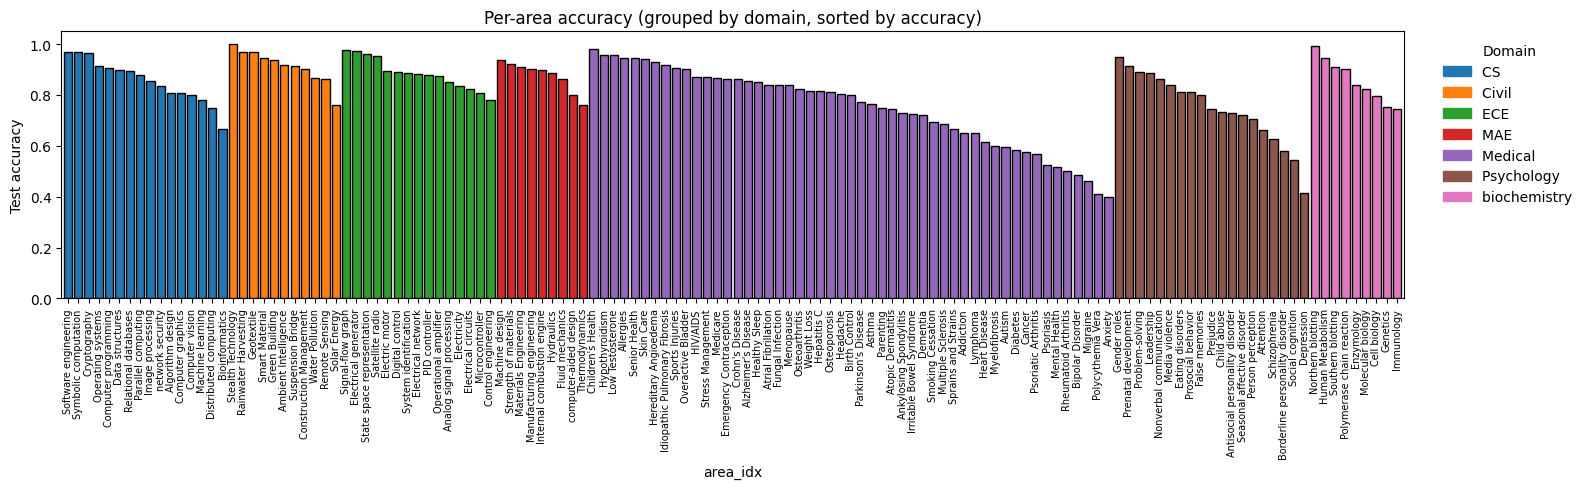


5 lowest-accuracy areas in Medical domain:
             area  accuracy  n_abstracts
          Anxiety  0.400000          262
Polycythemia Vera  0.409091          148
         Migraine  0.461538          178
 Bipolar Disorder  0.487179          260

5 highest-accuracy areas in Medical domain:
             area  accuracy  n_abstracts
        Allergies  0.944444          357
 Low Testosterone  0.956522          305
   Hypothyroidism  0.957447          315
Children's Health  0.981132          350







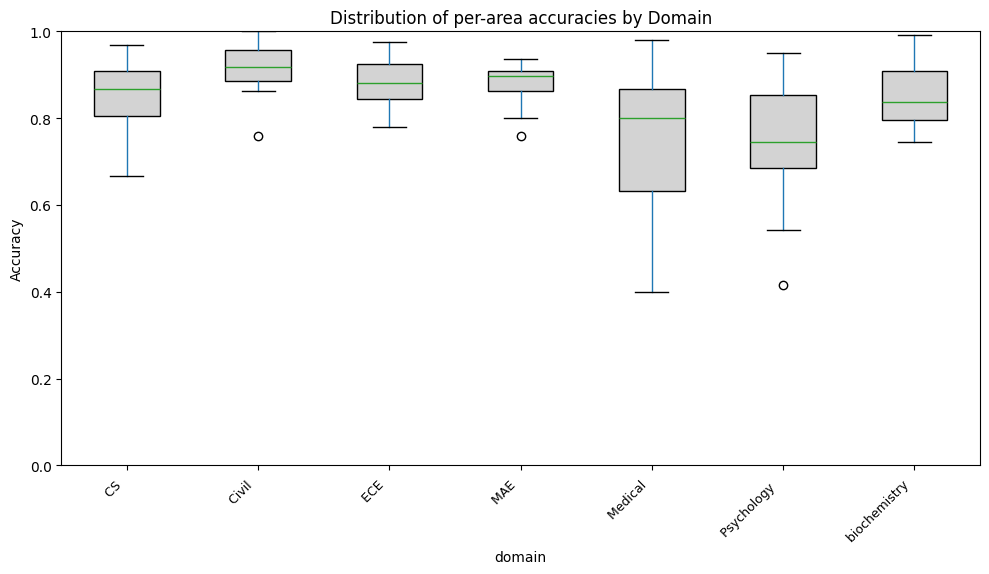

In [37]:
# ────────────────────────────────────────────────────────────────────────────
# 4. Enhanced visualisations & tables for the 130-area model (using saved checkpoint)
# ────────────────────────────────────────────────────────────────────────────
import pathlib, re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments
)
from matplotlib import cm

# ────────────────────────────────────────────────────────────────────────────
# 4-A. Reload Excel & build area→domain mapping
# ────────────────────────────────────────────────────────────────────────────
FILE_PATH = "/home/eldord/Big-Data-Abstracts-Classification/data/FilteredData100.xlsx"
TEXT_COL, AREA_COL, DOMAIN_COL = "Abstract", "area", "Domain"

df_full = (
    pd.read_excel(FILE_PATH)[[TEXT_COL, AREA_COL, DOMAIN_COL]]
      .dropna()
      .assign(**{AREA_COL: lambda d: d[AREA_COL].str.strip()})
)
area2domain = dict(zip(
    df_full.drop_duplicates(AREA_COL)[AREA_COL],
    df_full.drop_duplicates(AREA_COL)[DOMAIN_COL]
))
domains   = sorted(set(area2domain.values()))
domain2id = {d:i for i,d in enumerate(domains)}

# ────────────────────────────────────────────────────────────────────────────
# 4-B. 70/15/15 split stratified on *area* (same as training)
# ────────────────────────────────────────────────────────────────────────────
SEED = 42
df_lbl = df_full[[TEXT_COL, AREA_COL]].copy()
df_lbl["label"] = df_lbl[AREA_COL].map({l:i for i,l in enumerate(sorted(df_lbl[AREA_COL].unique()))})

train_df, tmp_df = train_test_split(
    df_lbl, test_size=0.30, stratify=df_lbl["label"], random_state=SEED
)
val_df, test_df = train_test_split(
    tmp_df, test_size=0.50, stratify=tmp_df["label"], random_state=SEED
)

hf_dset = DatasetDict({
    "train":      Dataset.from_pandas(train_df.reset_index(drop=True)),
    "validation": Dataset.from_pandas(val_df.reset_index(drop=True)),
    "test":       Dataset.from_pandas(test_df.reset_index(drop=True)),
})

label_list = sorted(df_lbl[AREA_COL].unique())

# ────────────────────────────────────────────────────────────────────────────
# 4-C. Tokenise with saved area tokenizer
# ────────────────────────────────────────────────────────────────────────────
tok_area = AutoTokenizer.from_pretrained("bert_wos_areas", local_files_only=True)

def tok_fn(batch):
    return tok_area(batch[TEXT_COL], truncation=True, max_length=512)

ds_tok = hf_dset.map(tok_fn, batched=True, remove_columns=[TEXT_COL])

# ────────────────────────────────────────────────────────────────────────────
# 4-D. Load saved area model and predict
# ────────────────────────────────────────────────────────────────────────────
model_area = AutoModelForSequenceClassification.from_pretrained(
    "bert_wos_areas", local_files_only=True
).to("cuda" if torch.cuda.is_available() else "cpu").eval()

eval_args = TrainingArguments(
    output_dir                = "tmp_eval_area",
    per_device_eval_batch_size= 16,
    do_predict                = True,
    logging_strategy          = "no",
)
trainer = Trainer(
    model     = model_area,
    args      = eval_args,
    tokenizer = tok_area,
)

test_out = trainer.predict(ds_tok["test"])
y_true   = test_out.label_ids
y_pred   = np.argmax(test_out.predictions, axis=-1)

# ────────────────────────────────────────────────────────────────────────────
# 4-D (cont.)  Per-area accuracy bar chart, grouped by domain & sorted
# ────────────────────────────────────────────────────────────────────────────
per_area_acc = (
    pd.DataFrame({"area_idx": y_true, "correct": y_true == y_pred})
      .groupby("area_idx")["correct"]
      .mean()
      .reindex(range(len(label_list)))
)

# bucket by domain
domain_buckets = {did: [] for did in domain2id.values()}
for idx, acc in per_area_acc.items():
    dom_id = domain2id[area2domain[label_list[idx]]]
    domain_buckets[dom_id].append((idx, acc))

order = []
for dom_id in sorted(domain_buckets):
    bucket_sorted = sorted(domain_buckets[dom_id], key=lambda x: x[1], reverse=True)
    order.extend([idx for idx, _ in bucket_sorted])

acc_ordered    = per_area_acc.iloc[order]
tab10_colors   = cm.tab10.colors   # <— grab the tuple of 10 colors
colors_ordered = [
    tab10_colors[domain2id[area2domain[label_list[i]]]]
    for i in order
]
labels_ordered = [label_list[i] for i in order]

fig, ax = plt.subplots(figsize=(16, 5))
acc_ordered.plot(
    kind="bar", ax=ax,
    color=colors_ordered, width=0.8, edgecolor="black"
)
ax.set_ylabel("Test accuracy")
ax.set_title("Per-area accuracy (grouped by domain, sorted by accuracy)")
ax.set_xticks(range(len(labels_ordered)))
ax.set_xticklabels(labels_ordered, rotation=90, ha="center", fontsize=7)

# domain legend
handles = [
    plt.Rectangle((0,0),1,1, color=tab10_colors[domain2id[d]])
    for d in domains
]
ax.legend(handles, domains, title="Domain",
          bbox_to_anchor=(1.02,1), loc="upper left", frameon=False)

plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────────────────────────────────


# ────────────────────────────────────────────────────────────────────────────
# 4-E. Counts for 5 lowest/highest-accuracy areas in 'Medical'
# ────────────────────────────────────────────────────────────────────────────
med_acc = (
    df_acc[df_acc["domain"]
          .str.contains("Medical", na=False, case=False)]
      .sort_values("accuracy")
)


bottom5 = med_acc.head(4).copy()
top5    = med_acc.tail(4).copy()

counts_full = df_full.groupby("area").size()
bottom5["n_abstracts"] = bottom5["area"].map(counts_full)
top5   ["n_abstracts"] = top5   ["area"].map(counts_full)

print("\n5 lowest-accuracy areas in Medical domain:")
print(bottom5[["area", "accuracy", "n_abstracts"]].to_string(index=False))

print("\n5 highest-accuracy areas in Medical domain:")
print(top5   [["area", "accuracy", "n_abstracts"]].to_string(index=False))

print("\n\n\n\n")

# ────────────────────────────────────────────────────────────────────────────
# 4-F. Box‐and‐whiskers of area accuracies by domain
# ────────────────────────────────────────────────────────────────────────────
df_acc = pd.DataFrame({
    "area":     label_list,
    "accuracy": per_area_acc.values
})
df_acc["domain"] = df_acc["area"].map(area2domain)

fig, ax = plt.subplots(figsize=(10, 6))
df_acc.boxplot(
    column="accuracy",
    by="domain",
    ax=ax,
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightgray", edgecolor="black")
)
plt.suptitle("")  
ax.set_title("Distribution of per-area accuracies by Domain")
ax.set_ylabel("Accuracy")
ax.set_ylim(0, 1)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.tight_layout()
plt.show()

### Captum LIG viz

In [7]:
# ──────────────────────────────────────────────────────────────────────────────
# 5.  Load saved classifier → pick a correct test sample → visualise attention
# ──────────────────────────────────────────────────────────────────────────────
from transformers import (AutoTokenizer,
                          AutoModelForSequenceClassification,
                          TrainingArguments,
                          Trainer)
import torch, pathlib, numpy as np
from bertviz import head_view
from captum.attr import LayerIntegratedGradients, visualization
import pandas as pd
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

# ───────────────────── 1. checkpoint & device ────────────────────────────────
MODEL_DIR = pathlib.Path("bert_wos_areas").resolve()   # <— adjust if needed
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tok       = AutoTokenizer.from_pretrained(MODEL_DIR)
ft_model  = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
ft_model.to(device).eval()

id2label  = {int(k): v for k, v in ft_model.config.id2label.items()}
label2id  = {v: k for k, v in id2label.items()}

# ───────────────────── 2. Dataset reload (fallback) ──────────────────────────
# If ds_tok / hf_dset are already in memory from earlier cells,
# this block is skipped automatically.
try:
    ds_tok
    hf_dset
    TEXT_COL
except NameError:
    print("⟹  ds_tok not found – rebuilding test split from Excel…")
    FILE_PATH = "/home/eldord/Big-Data-Abstracts-Classification/data/FilteredData100.xlsx"
    TEXT_COL  = "Abstract"        # name of the text column
    LABEL_COL = "area"            # name of the label column
    SEED      = 42

    df = (
        pd.read_excel(FILE_PATH)[[TEXT_COL, LABEL_COL]]
          .dropna()
          .assign(**{LABEL_COL: lambda d: d[LABEL_COL].str.strip()})
    )

    # match label strings with those the model was trained on
    df["labels"] = df[LABEL_COL].map(label2id)
    df = df.dropna(subset=["labels"]).astype({"labels": int})

    train_df, test_df = train_test_split(
        df, test_size=0.2, stratify=df["labels"], random_state=SEED
    )

    hf_dset = DatasetDict({
        "test": Dataset.from_pandas(test_df.reset_index(drop=True))
    })

    # tokenise
    def _tok(batch):
        return tok(batch[TEXT_COL], truncation=True, max_length=128)

    ds_tok = hf_dset.map(_tok, batched=True)
    ds_tok = ds_tok.remove_columns([TEXT_COL, LABEL_COL])

# ───────────────────── 3. lightweight Trainer for predict() ──────────────────
eval_args = TrainingArguments(
    output_dir="tmp_eval",
    per_device_eval_batch_size=16,
    do_predict=True,
    fp16=torch.cuda.is_available(),
    logging_strategy="steps",
    logging_steps=25,
)
trainer = Trainer(model=ft_model, args=eval_args, tokenizer=tok)

# ───────────────────── 4-A.  BertViz helper ──────────────────────────────────
def save_attention_html(text: str,
                        html_file: str = "bert_attention_example.html") -> str:
    enc = tok(text, return_tensors="pt",
              truncation=True, max_length=128).to(device)

    with torch.no_grad():
        out = ft_model(**enc, output_attentions=True)

    tokens = tok.convert_ids_to_tokens(enc["input_ids"][0])
    html   = head_view(out.attentions, tokens, html_action="return")

    path = pathlib.Path(html_file).expanduser().resolve()
    path.write_text(html.data, encoding="utf-8")
    return str(path)

# ───────────────────── 4-B.  pick a correct test example ─────────────────────
test_out     = trainer.predict(ds_tok["test"])
y_true       = test_out.label_ids
y_pred       = test_out.predictions.argmax(axis=-1)
test_texts   = hf_dset["test"][TEXT_COL]

idx_ok       = int(np.where(y_true == y_pred)[0][0])  # first correct sample
example_text = test_texts[idx_ok]
example_true = id2label[y_true[idx_ok]]

print(f"\nSaving attention heat-map for «{example_text[:80]}…» "
      f"(true: {example_true})")
html_path = save_attention_html(example_text)
print(f"✓ BertViz HTML → {html_path}")

# ───────────────────── 4-C.  Captum LIG setup  ───────────────────────────────
def _forward(input_ids, attention_mask=None):
    return ft_model(input_ids=input_ids,
                    attention_mask=attention_mask).logits

lig = LayerIntegratedGradients(_forward, ft_model.bert.embeddings)

def token_importance(text: str, true_label: str | None = None):
    enc = tok(text, return_tensors="pt",
              truncation=True, max_length=128).to(device)

    with torch.no_grad():
        logits  = ft_model(**enc).logits
        pred_id = logits.argmax(-1).item()

    atts, delta = lig.attribute(
        inputs                 = enc["input_ids"],
        additional_forward_args= (enc["attention_mask"],),
        target                 = pred_id,
        n_steps                = 25,
        return_convergence_delta=True
    )

    scores  = atts.sum(dim=-1).squeeze(0).detach().cpu().numpy()
    tokens  = tok.convert_ids_to_tokens(enc["input_ids"][0])
    pred_pb = torch.softmax(logits, -1)[0, pred_id].item()
    true_lb = true_label if true_label is not None else id2label[pred_id]

    return visualization.VisualizationDataRecord(
        scores, pred_pb, id2label[pred_id], true_lb,
        id2label[pred_id], scores.sum(), tokens, delta.item()
    )

# ────────── run Captum on the same example ──────────
print("\n=== Captum LIG on that example ===")
vis_rec = token_importance(example_text, true_label=example_true)
visualization.visualize_text([vis_rec])


⟹  ds_tok not found – rebuilding test split from Excel…


Map: 100%|██████████| 9324/9324 [00:02<00:00, 4093.78 examples/s]
/tmp/ipykernel_456555/3384790380.py:74: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=ft_model, args=eval_args, tokenizer=tok)



Saving attention heat-map for «Purpose: The purpose of this study is to describe the underlying topics and the …» (true: Leadership)


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


✓ BertViz HTML → /sise/home/eldord/Big-Data-Abstracts-Classification/models/bert_attention_example.html

=== Captum LIG on that example ===


## on Denis's abstracts

In [23]:
import re
import torch
import pathlib
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from captum.attr import LayerIntegratedGradients, visualization

# ────────────────────────────────────────────────────────────
# 0.  Setup paths and device
# ────────────────────────────────────────────────────────────
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ROOT   = pathlib.Path("/sise/home/eldord/Big-Data-Abstracts-Classification")

# ────────────────────────────────────────────────────────────
# 1.  Load the *domain* model & tokenizer
# ────────────────────────────────────────────────────────────
dom_ckpts = sorted(
    (ROOT / "models" / "bert_wos_domains").glob("checkpoint-*"),
    key=lambda p: int(re.search(r"\d+$", p.name)[0])
)
DOM_DIR   = dom_ckpts[-1]
tok_dom   = AutoTokenizer.from_pretrained(str(DOM_DIR), local_files_only=True)
model_dom = AutoModelForSequenceClassification.from_pretrained(
    str(DOM_DIR), local_files_only=True
).to(DEVICE).eval()
lig_dom   = LayerIntegratedGradients(
    lambda ids, mask: model_dom(input_ids=ids, attention_mask=mask).logits,
    model_dom.bert.embeddings
)
id2label_dom = {int(k): v for k, v in model_dom.config.id2label.items()}

# ────────────────────────────────────────────────────────────
# 2.  Load the *area* model & tokenizer
# ────────────────────────────────────────────────────────────
AREA_DIR   = ROOT / "models" / "bert_wos_areas"
tok_area   = AutoTokenizer.from_pretrained(str(AREA_DIR), local_files_only=True)
model_area = AutoModelForSequenceClassification.from_pretrained(
    str(AREA_DIR), local_files_only=True
).to(DEVICE).eval()
lig_area   = LayerIntegratedGradients(
    lambda ids, mask: model_area(input_ids=ids, attention_mask=mask).logits,
    model_area.bert.embeddings
)
id2label_area = {int(k): v for k, v in model_area.config.id2label.items()}

# ────────────────────────────────────────────────────────────
# 3.  Captum‐based token‐importance helper (with true_label)
# ────────────────────────────────────────────────────────────
def token_importance(
    text: str,
    tok,
    model,
    lig,
    id2label: dict,
    true_label: str | None = None
):
    # tokenize + forward pass
    enc = tok(text, return_tensors="pt", truncation=True).to(DEVICE)
    with torch.no_grad():
        logits = model(**enc).logits
        pred   = logits.argmax(dim=-1).item()
        prob   = torch.softmax(logits, dim=-1)[0, pred].item()

    # integrated gradients attributions
    atts, delta = lig.attribute(
        inputs                 = enc["input_ids"],
        additional_forward_args= (enc["attention_mask"],),
        target                 = pred,
        n_steps                = 25,
        return_convergence_delta=True
    )
    scores = atts.sum(dim=-1).squeeze(0).cpu().numpy()  # (seq_len,)
    tokens = tok.convert_ids_to_tokens(enc["input_ids"][0])

    # fill in true_label if not provided
    if true_label is None:
        true_label = id2label[pred]

    # build the VisualizationDataRecord
    vis_rec = visualization.VisualizationDataRecord(
        word_attributions = scores,               # importance per token
        pred_prob         = prob,                 # model confidence
        pred_class        = id2label[pred],       # model’s prediction
        true_class        = true_label,           # your provided label
        attr_class        = id2label[pred],       # class IG targeted
        attr_score        = scores.sum(),         # sum of attributions
        raw_input_ids     = tokens,               # list of tokens
        convergence_score = delta.item()          # IG convergence delta
    )
    return vis_rec

# ────────────────────────────────────────────────────────────
# 4.  Example abstract + its true domain & area
# ────────────────────────────────────────────────────────────
example_text = """
We propose and evaluate an authentication scheme that improves usability and user experience issues in the authentication process due to its reliance on people's aesthetic tastes and preferences. The scheme uses aesthetic images to verify the identity of computer users. It relies on three major premises regarding visual aesthetics: (i) that an individual has different preferences for different aesthetic stimuli; (ii) that these preferences are relatively consistent; and (iii) that aesthetic tastes are subjective and, therefore, there are considerable individual differences in aesthetic preferences. Following a review of the scientific basis for these premises, we describe the concept of the aesthetic evaluation-based authentication (AEbA) method and illustrate an implementation of it. We address AEbA's advantages and disadvantages relative to other related methods and conclude that it is adequate for low-to-medium security domains. It cannot serve as a compulsory method because we suspect that a certain portion of the user population lacks the degree of aesthetic sensitivity required to use the system effectively. On the plus side, the method offers a positive experience. It alleviates the burden of memorizing passwords to a minimum, and relative to other usability-oriented schemes provides better security in terms of shoulder-surfing, phishing, and password space. Finally, we report on a pilot evaluation of the concept and its feasibility that supports the method's main tenets, provides insights about implementation challenges and suggestions for improvements.
"""
true_domain = "Computer Science"
true_area   = "network security"  # (only needed if you run an area-level model)

# ────────────────────────────────────────────────────────────
# 5.  Visualize domain‐model attributions (with true label)
# ────────────────────────────────────────────────────────────
print("=== Domain model token importances ===")
vis_dom = token_importance(
    example_text,
    tok_dom, model_dom, lig_dom, id2label_dom,
    true_label=true_domain
)
visualization.visualize_text([vis_dom])

# ────────────────────────────────────────────────────────────
# 6.  Visualize area‐model attributions (with true label)
# ────────────────────────────────────────────────────────────
print("\n=== Area model token importances ===")
vis_area = token_importance(
    example_text,
    tok_area, model_area, lig_area, id2label_area,
    true_label=true_area
)
visualization.visualize_text([vis_area]);


=== Domain model token importances ===



=== Area model token importances ===


In [25]:
import re
import html
import pathlib
import torch
import numpy as np
from bertviz import head_view
from captum.attr import LayerIntegratedGradients
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ────────────────────────────────────────────────────────────
# Paths & device
# ────────────────────────────────────────────────────────────
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ROOT   = pathlib.Path("/sise/home/eldord/Big-Data-Abstracts-Classification")

# ────────────────────────────────────────────────────────────
# Load domain‐fine‐tuned checkpoint
# ────────────────────────────────────────────────────────────
dom_ckpts = sorted(
    (ROOT / "models" / "bert_wos_domains").glob("checkpoint-*"),
    key=lambda p: int(re.search(r"\d+$", p.name)[0])
)
DOM_DIR   = dom_ckpts[-1]
tok_dom   = AutoTokenizer.from_pretrained(str(DOM_DIR), local_files_only=True)
model_dom = AutoModelForSequenceClassification.from_pretrained(
    str(DOM_DIR), local_files_only=True
).to(DEVICE).eval()
lig_dom   = LayerIntegratedGradients(
    lambda ids, mask: model_dom(input_ids=ids, attention_mask=mask).logits,
    model_dom.bert.embeddings
)

# ────────────────────────────────────────────────────────────
# Load area‐fine‐tuned checkpoint
# ────────────────────────────────────────────────────────────
AREA_DIR   = ROOT / "models" / "bert_wos_areas"
tok_area   = AutoTokenizer.from_pretrained(str(AREA_DIR), local_files_only=True)
model_area = AutoModelForSequenceClassification.from_pretrained(
    str(AREA_DIR), local_files_only=True
).to(DEVICE).eval()
lig_area   = LayerIntegratedGradients(
    lambda ids, mask: model_area(input_ids=ids, attention_mask=mask).logits,
    model_area.bert.embeddings
)

# ────────────────────────────────────────────────────────────
# Shared constants
# ────────────────────────────────────────────────────────────
STOP_WORDS      = ENGLISH_STOP_WORDS
VIBRANT_PALETTE = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
]

# ────────────────────────────────────────────────────────────
# BertViz + IG helper for filtered tokens & vibrant colors
# ────────────────────────────────────────────────────────────
def save_focus_attention(
    text: str,
    model: torch.nn.Module,
    tokenizer,
    lig: LayerIntegratedGradients,
    k_tokens: int = 30,
    html_file: str = "attention.html"
) -> str:
    # 1️⃣ run model to get attentions
    enc = tokenizer(text, return_tensors="pt", truncation=True).to(DEVICE)
    with torch.no_grad():
        outs = model(**enc, output_attentions=True)

    # 2️⃣ compute IG scores per token
    def _f(ids, mask): 
        return model(input_ids=ids, attention_mask=mask).logits
    atts, delta = lig.attribute(
        inputs                 = enc["input_ids"],
        additional_forward_args= (enc["attention_mask"],),
        target                 = outs.logits.argmax(dim=-1).item(),
        n_steps                = 25,
        return_convergence_delta=True
    )
    scores = atts.sum(dim=-1).squeeze(0).cpu().numpy()    # (L,)
    tokens = tokenizer.convert_ids_to_tokens(enc["input_ids"][0])

    # 3️⃣ select top-k non-stop tokens + keep CLS/SEP
    cls, sep = 0, len(tokens) - 1
    mask     = np.zeros_like(scores, dtype=bool)
    abs_s    = np.abs(scores).copy()
    abs_s[[cls, sep]] = -1
    mask[np.argsort(abs_s)[-k_tokens:]] = True

    for i, t in enumerate(tokens):
        if ((t.lower().lstrip("##") in STOP_WORDS) or t == "-") and i not in (cls, sep):
            mask[i] = False
    mask[[cls, sep]] = True
    idx = np.where(mask)[0]

    # 4️⃣ slice attentions to only those tokens
    layers = []
    for layer in outs.attentions:               # (1, heads, L, L)
        sl = layer[:, :, idx][:, :, :, idx]     # (1, heads, K, K)
        layers.append(sl)
    attn_tuple = tuple(torch.tensor(l) for l in layers)

    # 5️⃣ prettify token strings
    pretty = [html.escape(tokens[i].replace("##", "")) for i in idx]

    # 6️⃣ generate BertViz HTML
    html_obj = head_view(attn_tuple, pretty, prettify_tokens=False, html_action="return")
    data     = html_obj.data

    # 7️⃣ inject vibrant color palette
    pal_js = "[" + ",".join(f'"{c}"' for c in VIBRANT_PALETTE) + "]"
    data   = re.sub(r"(var\s+colors?\s*=\s*)\[[^\]]*\];", fr"\1{pal_js};", data)

    # 8️⃣ write out
    path = pathlib.Path(html_file).expanduser().resolve()
    path.write_text(data, encoding="utf-8")
    return str(path)

# ────────────────────────────────────────────────────────────
# Example to run on the same abstract
# ────────────────────────────────────────────────────────────
example_text = """
We propose and evaluate an authentication scheme that improves usability and user experience issues in the authentication process due to its reliance on people's aesthetic tastes and preferences.
"""

# Domain
dom_html = save_focus_attention(
    example_text,
    model_dom,
    tok_dom,
    lig_dom,
    k_tokens=30,
    html_file="vibrant_domain_attention.html"
)
print("✓ Domain BertViz saved →", dom_html)

# Area
area_html = save_focus_attention(
    example_text,
    model_area,
    tok_area,
    lig_area,
    k_tokens=30,
    html_file="vibrant_area_attention.html"
)
print("✓ Area BertViz saved   →", area_html)


✓ Domain BertViz saved → /sise/home/eldord/Big-Data-Abstracts-Classification/models/vibrant_domain_attention.html
✓ Area BertViz saved   → /sise/home/eldord/Big-Data-Abstracts-Classification/models/vibrant_area_attention.html


/tmp/ipykernel_637491/569199404.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attn_tuple = tuple(torch.tensor(l) for l in layers)


BertViz explained:

* layer selector - presents each of the 12 layers of BERT

* color legend - each color is an attention head (12 per layer, all in all 144)

* left column - queries - each token "asking" where to look

* right column - keys - each token "answering" who it attends to

    * [CLS] - at top, classification token
    * [SEP] - at bottom, separator

* attention lines - line from A to B = "token A attends to token B"
    * opacity correlates with attention weight

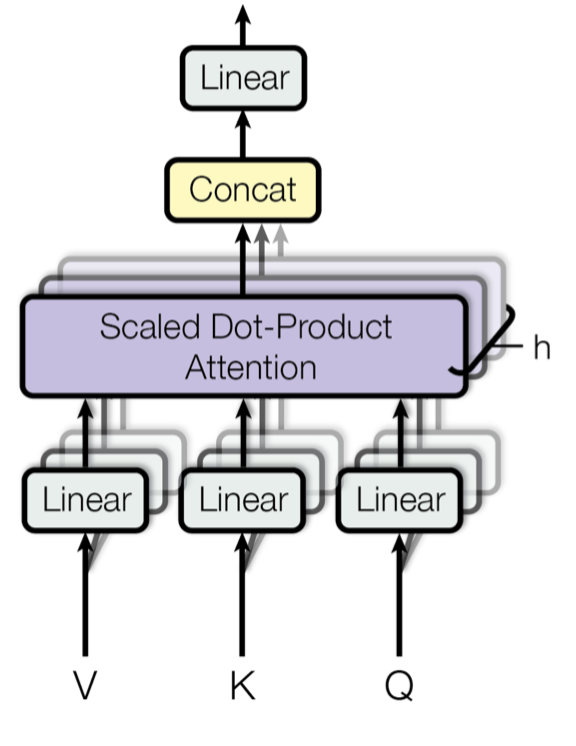